In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

0.06860328293222795 0.6918021529173876


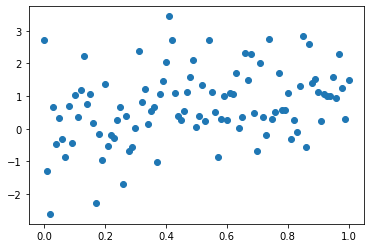

In [34]:
x = np.linspace(0, 1, 101)
alpha = np.random.rand()
beta = np.random.rand()
delta = np.random.normal(0, 1, 101)
print(alpha, beta)
y = alpha * x + beta + delta

with open("x.txt") as f:
    i = 0
    for l in f:
        x[i] = float(l.rstrip())
        i += 1

with open("y.txt") as f:
    i = 0
    for l in f:
        y[i] = float(l.rstrip())
        i += 1

plt.scatter(x, y)
plt.show()

functions for this task:

In [35]:
def F1(a, b, x):
    return a * x + b

def F2(a, b, x):
    return a / (1 + b * x)

def gradf1(x, *args):
    x_, y_ = x
    x1, y1, F = args
    fu = 0.0
    fv = 0.0
    for i in range(len(x1)):
        fu += 2 * (F(x_, y_, x1[i]) - y1[i]) * x1[i]
        fv += 2 * (F(x_, y_, x1[i]) - y1[i])

    return np.asarray((fu, fv))

def gradf2(x, *args):
    x_, y_ = x
    x1, y1, F = args
    fu = 0.0
    fv = 0.0
    for i in range(len(x1)):
        fu += 2 * (F(x_, y_, x1[i]) - y1[i]) * F(1, y_, x1[i])
        fv += 2 * (F(x_, y_, x1[i]) - y1[i]) * ((-x_) * x1[i] / ((y_ * x1[i] + 1) ** 2))

    return np.asarray((fu, fv))

def f(x, *args):
    x_, y_ = x
    x1, y1, F = args
    res = 0.0
    for i in range(len(x1)):
        res += (F(x_, y_, x1[i]) - y1[i]) ** 2
    return res

def ff(w, x, y, F):
    return F(w[0], w[1], x) - y

CG algorithm:

Optimization terminated successfully.
         Current function value: 110.615737
         Iterations: 2
         Function evaluations: 5
         Gradient evaluations: 5
[1.22065652 0.0968874 ]
cost function:  110.61573657719481
Optimization terminated successfully.
         Current function value: 113.984740
         Iterations: 8
         Function evaluations: 22
         Gradient evaluations: 22
[ 0.419995   -0.70031631]
cost function:  113.98473997017676


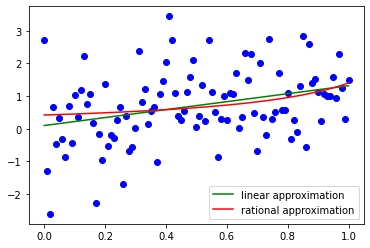

In [36]:
eps = 1e-3
x0 = np.asarray((1, 1))
res1 = scipy.optimize.minimize(f,
                               x0,
                               jac=gradf1,
                               method='CG',
                               args=(x, y, F1),
                               options={'disp': True, 'gtol': eps})
print(res1['x'])
print("cost function: ", f((res1['x'][0], res1['x'][1]), x, y, F1))
res2 = scipy.optimize.minimize(f,
                               x0,
                               jac=gradf2,
                               method='CG',
                               args=(x, y, F2),
                               options={'disp': True, 'gtol': eps})
print(res2['x'])
print("cost function: ", f((res2['x'][0], res2['x'][1]), x, y, F2))

plt.plot(x, F1(res1['x'][0], res1['x'][1], x), color='green', label='linear approximation')
plt.plot(x, F2(res2['x'][0], res2['x'][1], x), color='red', label='rational approximation')
plt.scatter(x, y, color='blue')
plt.legend()
plt.show()

BFGS algorithm:

Optimization terminated successfully.
         Current function value: 110.615737
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
[1.22065652 0.0968874 ]
cost function:  110.61573657719482
Optimization terminated successfully.
         Current function value: 113.984740
         Iterations: 8
         Function evaluations: 15
         Gradient evaluations: 15
[ 0.41999391 -0.70031655]
cost function:  113.98473997013087


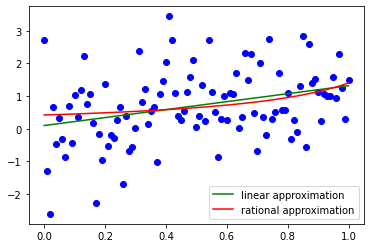

In [37]:
x0 = np.asarray((1, 1))
ress1 = scipy.optimize.minimize(f,
                               x0,
                               jac=gradf1,
                               method='BFGS',
                               args=(x, y, F1),
                               options={'disp': True, 'gtol': eps})
print(ress1['x'])
print("cost function: ", f((ress1['x'][0], ress1['x'][1]), x, y, F1))

ress2 = scipy.optimize.minimize(f,
                               x0,
                               jac=gradf2,
                               method='BFGS',
                               args=(x, y, F2),
                               options={'disp': True, 'gtol': eps})
print(ress2['x'])
print("cost function: ", f((ress2['x'][0], ress2['x'][1]), x, y, F2))

plt.plot(x, F1(ress1['x'][0], ress1['x'][1], x), color='green', label='linear approximation')
plt.plot(x, F2(ress2['x'][0], ress2['x'][1], x), color='red', label='rational approximation')
plt.scatter(x, y, color='blue')
plt.legend()
plt.show()

LM argorithm:

`gtol` termination condition is satisfied.
Function evaluations 6, initial cost 8.6961e+01, final cost 5.5308e+01, first-order optimality 5.63e-08.
[1.22065651 0.0968874 ]
cost function:  110.6157365771948
grad:  [-5.63273764e-08 -4.62204190e-08]
`gtol` termination condition is satisfied.
Function evaluations 27, initial cost 8.6961e+01, final cost 5.6993e+01, first-order optimality 1.34e-01.
[ 0.42147669 -0.6983001 ]
cost function:  113.98503610194074
grad:  [0.01731528 0.13359484]


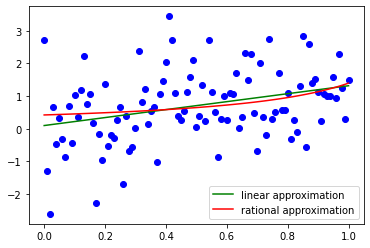

In [38]:
resss1 = scipy.optimize.least_squares(ff,
                                    np.array([0.0, 0.0]),
                                    args=(x, y, F1),
                                    method='lm',
                                    xtol=1e-15,
                                    gtol=eps,
                                    ftol=1e-15,
                                    verbose=1)
print(resss1['x'])
print("cost function: ", f((resss1['x'][0], resss1['x'][1]), x, y, F1))
print("grad: ", resss1.grad)

resss2 = scipy.optimize.least_squares(ff,
                                    np.array([0.0, 0.0]),
                                    args=(x, y, F2),
                                    method='lm',
                                    xtol=1e-15,
                                    gtol=eps,
                                    ftol=1e-15,
                                    verbose=1)
print(resss2['x'])
print("cost function: ", f((resss2['x'][0], resss2['x'][1]), x, y, F2))
print("grad: ", resss2.grad)

plt.plot(x, F1(resss1['x'][0], resss1['x'][1], x), color='green', label='linear approximation')
plt.plot(x, F2(resss2['x'][0], resss2['x'][1], x), color='red', label='rational approximation')
plt.scatter(x, y, color='blue')
plt.legend()
plt.show()

Gradiend Descent argorithm:

number of iterations:  1332
cost Function:  110.61573661324161
found argmin:  1.220592203496221 0.09692186681769245
number of iterations:  484
cost Function:  113.98473997447782
found argmin:  0.41999970891767874 -0.7003102616850153


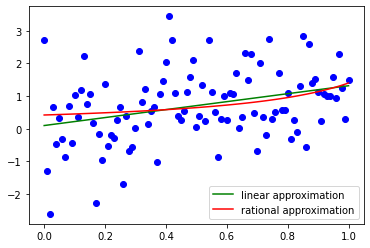

In [39]:
def grad_descent(x0, f, gradf, x, y, alpha, eps, F):
    x_, y_ = x0
    it = 0
    while True:
        it += 1
        xp = x_
        yp = y_
        grad = gradf((x_, y_), x, y, f)
        # print("gradient: ", grad)
        x_ = xp - alpha * grad[0]
        y_ = yp - alpha * grad[1]
        if np.sqrt((grad[0])**2 + (grad[1])**2) < eps:
            print("number of iterations: ", it)
            print("cost Function: ", F((x_, y_), x, y, f))
            print("found argmin: ", x_, y_)
            return x_, y_

a1, b1 = grad_descent((1, 1), F1, gradf1, x, y, 0.0005, 1e-3, f)
a2, b2 = grad_descent((1, 1), F2, gradf2, x, y, 0.0005, 1e-3, f)

plt.plot(x, F1(a1, b1, x), color='green', label='linear approximation')
plt.plot(x, F2(a2, b2, x), color='red', label='rational approximation')
plt.scatter(x, y, color='blue')
plt.legend()
plt.show()

PART OF TASK 2:

In [40]:
def F10(a, b):
    return a * x + b

def F11(a, b, x):
    return a * x + b

def F20(a, b):
    return a / (1 + b * x)

def F22(a, b, x):
    return a / (1 + b * x)

def D(a, b, F):
    x_ = F(a, b)
    return np.inner(y - x_, y - x_)

def D1(a, b):
    res = 0.0
    for i in range(len(x)):
        res += (F11(a, b, x[i]) - y[i]) ** 2
    return res

def D2(a, b):
    res = 0.0
    for i in range(len(x)):
        res += (F22(a, b, x[i]) - y[i]) ** 2
    return res

def exh_search_2(F, supa, supb, eps):
    a = np.linspace(-supa, supa, int(2 * supa / eps + 1))
    b = np.linspace(-supb, supb, int(2 * supb / eps + 1))
    cx, cy = np.meshgrid(a, b)
    sh = (len(b), len(a))
    res = np.zeros(shape=sh)
    for i in range(np.shape(cx)[0]):
        for j in range(np.shape(cx)[1]):
            res[i, j] = D(cx[i, j], cy[i, j], F)
            # print(cx[i, j], cy[i, j])

    # print(np.around(res, decimals=0))
    ind = np.unravel_index(np.nanargmin(res), shape=sh)
    return cx[ind[0], ind[1]], cy[ind[0], ind[1]]

/tmp/ipykernel_118724/2530605387.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return a / (1 + b * x)
/tmp/ipykernel_118724/2530605387.py:8: RuntimeWarning: invalid value encountered in true_divide
  return a / (1 + b * x)


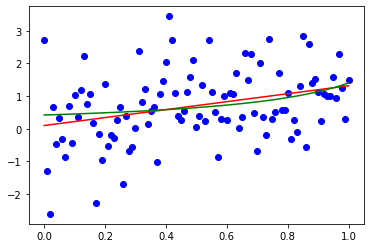

In [41]:
a00, b00 = exh_search_2(F10, 2, 2, eps)
a11, b11 = exh_search_2(F20, 2, 1, eps)
# print(a0, b0)
plt.scatter(x, y, color='blue')
plt.plot(x, F10(a00, b00), color='red')
plt.plot(x, F20(a11, b11), color='green')
plt.show()

Optimization terminated successfully.
Number of iterations:  63
Number of f evaluations:  117
[1.22033794 0.09702419]
Optimization terminated successfully.
Number of iterations:  51
Number of f evaluations:  97
[ 0.41982918 -0.7002524 ]


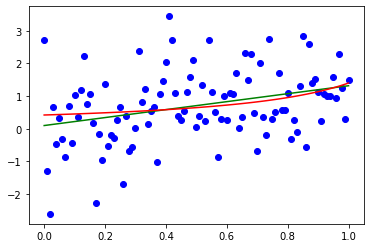

In [42]:
D11 = lambda x: D1(*x)
D22 = lambda x: D2(*x)

res10 = scipy.optimize.minimize(D11, (0, 0), method='Nelder-Mead', tol=eps)
print(res10['message'])
print("Number of iterations: ", res10['nit'])
print("Number of f evaluations: ", res10['nfev'])
print(res10['x'])

plt.plot(x, F10(res1['x'][0], res1['x'][1]), color='green')

res20 = scipy.optimize.minimize(D22, (0, 0), method='Nelder-Mead', tol=eps)
print(res20['message'])
print("Number of iterations: ", res20['nit'])
print("Number of f evaluations: ", res20['nfev'])
print(res20['x'])

plt.plot(x, F20(res20['x'][0], res20['x'][1]), color='red')
plt.scatter(x, y, color='blue')
plt.show()

In [43]:
def gauss(x1, x2, F, eps):
    it = 0
    while True:
        it += 1
        x1p = x1
        x2p = x2
        a = np.linspace(-2, 2, int(2 / eps + 1))
        b = np.linspace(-2, 2, int(2 / eps + 1))

        res = np.zeros(shape=np.shape(b))
        for i in range(len(b)):
            res[i] = F(x1, b[i])
        index = np.nanargmin(res)
        x2 = b[index]

        res = np.zeros(shape=np.shape(b))
        for i in range(len(a)):
            res[i] = F(a[i], x2)
        index = np.nanargmin(res)
        x1 = a[index]
        if np.sqrt((x1 - x1p)**2 + (x2-x2p)**2) < eps:
            break

    print("Number of iterations: ", it)
    return x1, x2

Number of iterations:  20
1.2160000000000002 0.10000000000000009


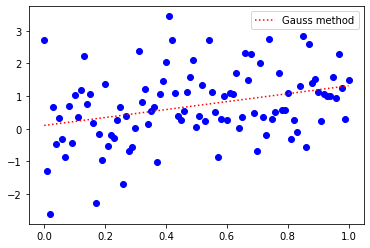

In [44]:
ag1, bg1 = gauss(0, 0, D1, eps)
print(ag1, bg1)
plt.plot(x, F10(ag1, bg1), ':', color='red', label='Gauss method')
plt.scatter(x, y, color='blue')
plt.legend()

/tmp/ipykernel_118724/2530605387.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return a / (1 + b * x)


Number of iterations:  2
0.0 -1.998


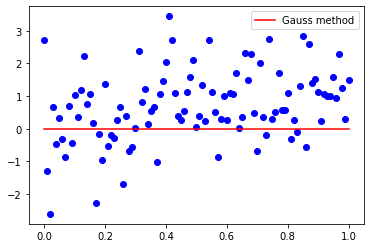

In [45]:
ag2, bg2 = gauss(0, 0, D2, eps)
print(ag2, bg2)
plt.plot(x, F20(ag2, bg2), color='red', label='Gauss method')
plt.scatter(x, y, color='blue')
plt.legend()
plt.show()

PLOTS

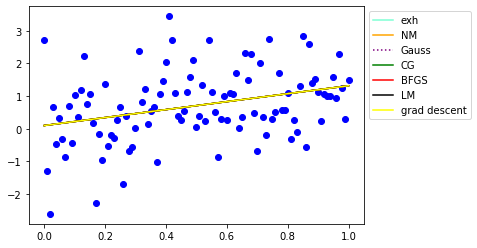

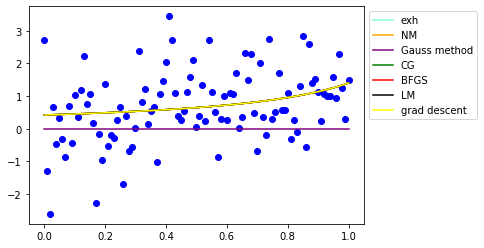

In [52]:
plt.plot(x, F10(a00, b00), color='aquamarine', label='exh')
plt.plot(x, F10(res1['x'][0], res1['x'][1]), color='orange', label='NM')
plt.plot(x, F10(ag1, bg1), ':', color='purple', label='Gauss')

plt.plot(x, F1(res1['x'][0], res1['x'][1], x), color='green', label='CG')
plt.plot(x, F1(ress1['x'][0], ress1['x'][1], x), color='red', label='BFGS')
plt.plot(x, F1(resss1['x'][0], resss1['x'][1], x), color='black', label='LM')
plt.plot(x, F1(a1, b1, x), color='yellow', label='grad descent')
plt.scatter(x, y, color='blue')
plt.legend(bbox_to_anchor=(1.0, 0.8, 0.3, 0.2), loc='upper left')
plt.savefig("plot1.png", dpi=200, bbox_inches='tight')
plt.show()

plt.plot(x, F20(a11, b11), color='aquamarine', label='exh')
plt.plot(x, F20(res20['x'][0], res20['x'][1]), color='orange', label='NM')
plt.plot(x, F20(ag2, bg2), color='purple', label='Gauss method')

plt.plot(x, F2(res2['x'][0], res2['x'][1], x), color='green', label='CG')
plt.plot(x, F2(ress2['x'][0], ress2['x'][1], x), color='red', label='BFGS')
plt.plot(x, F2(resss2['x'][0], resss2['x'][1], x), color='black', label='LM')
plt.plot(x, F2(a2, b2, x), color='yellow', label='grad descent')
plt.scatter(x, y, color='blue')
plt.legend(bbox_to_anchor=(1.0, 0.8, 0.3, 0.2), loc='upper left')
plt.savefig("plot2.png", dpi=200, bbox_inches='tight')
plt.show()